# РК №1
### Овчинников Данила Алексеевич ИУ5-62Б (Вариант 14)

Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Данные: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
import plotly
import missingno as msno
from numpy import nan 
import random
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

### Загрузим датасет и выведем информацию о нем.

In [7]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [8]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Подсчитаем количество пропусков по столбцам.

In [10]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### В датасете отсутствуют пропуски.
Добавим вручную по 5% пропусков в один количественный признак и в один категориальный. В качестве количественного выберем столбец 'GRE Score', а в качестве категориального 'University Rating', принимающий значения в диапазоне [1,5].

In [11]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [12]:
rnd_nums = random.sample(range(df.shape[0]), int(df.shape[0]*0.05))
for i in range (len(rnd_nums)):
    df.loc[df['Serial No.'] == rnd_nums[i], 'University Rating'] = nan

In [13]:
rnd_nums = random.sample(range(df.shape[0]), int(df.shape[0]*0.05))
for i in range (len(rnd_nums)):
    df.loc[df['Serial No.'] == rnd_nums[i], 'GRE Score'] = nan

In [14]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316.0,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103,2.0,2.0,3.0,8.21,0,0.65


In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Serial No. - 0.0%
GRE Score - 5.0%
TOEFL Score - 0.0%
University Rating - 5.0%
SOP - 0.0%
LOR  - 0.0%
CGPA - 0.0%
Research - 0.0%
Chance of Admit  - 0.0%


### Заполнение пропусков.
Удаление строк с пропусками в данном случае приведёт к резкому сокращению датасета и последующему ухудшению качества модели.
Следовательно, необходимо заполнить пропуски некоторыми значениями, т.е. провести импьютацию.

Сначала возьмем столбец количественного признака и построим гистограмму распределения его значений.

<Axes: ylabel='Frequency'>

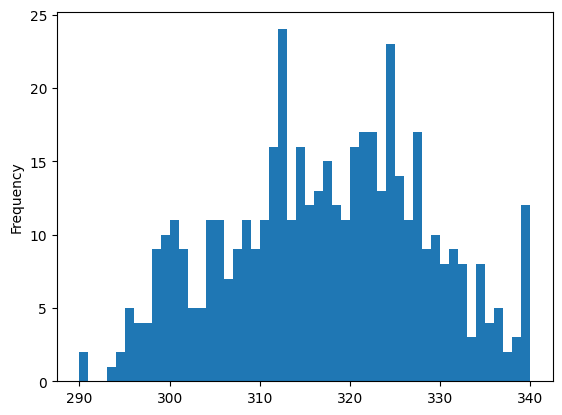

In [16]:
df['GRE Score'].plot.hist(bins=50)

Распределение значений походит на нормальное, но имеются очень большие выбросы. Было решено проводить импьютацию по медиане, так как она более устойчива к выбросам.

In [17]:
imputer = SimpleImputer(strategy='median', missing_values=nan)
imputer = imputer.fit(df[['GRE Score']])
df['GRE Score'] = imputer.transform(df[['GRE Score']])

Построим гистограмму для категориального признака.

<Axes: ylabel='Frequency'>

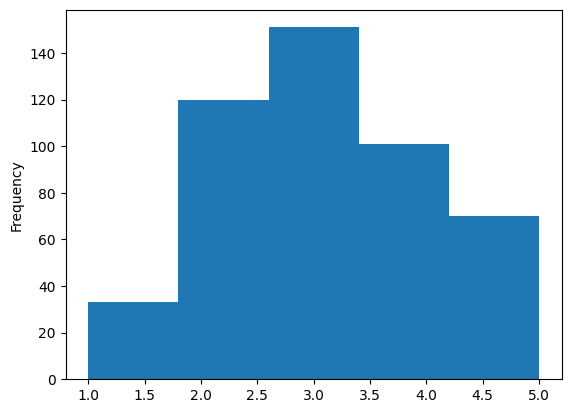

In [18]:
df['University Rating'].plot.hist(bins=5)

Если заполнить пропуски наиболее часто встречающимся (most frequent) значением, это сильно повлияет на распределение, что может испортить корреляцию датасета. Поэтому пропущенные значения заменим на отдельную константу "-1".

In [19]:
imputer = SimpleImputer(missing_values=nan, strategy='constant', fill_value=-1)
imputer = imputer.fit(df[['University Rating']])
df['University Rating'] = imputer.transform(df[['University Rating']])

In [20]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Serial No. - 0.0%
GRE Score - 0.0%
TOEFL Score - 0.0%
University Rating - 0.0%
SOP - 0.0%
LOR  - 0.0%
CGPA - 0.0%
Research - 0.0%
Chance of Admit  - 0.0%


### Посмотрим на корреляционную матрицу после заполнения пропусков.

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.092217,-0.141696,-0.034333,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.092217,1.000000,0.811030,0.487220,0.603882,0.522644,0.805596,0.558999,0.793655
TOEFL Score,-0.141696,0.811030,1.000000,0.474221,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.034333,0.487220,0.474221,1.000000,0.584181,0.496553,0.559994,0.301087,0.531652
SOP,-0.137352,0.603882,0.644410,0.584181,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.522644,0.541563,0.496553,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.805596,0.810574,0.559994,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.558999,0.467012,0.301087,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.793655,0.792228,0.531652,0.684137,0.645365,0.882413,0.545871,1.000000


### Дальнейшее построение модели машинного обучения.
Для построения модели можно удалить столбец с серийным номером записи (Serial No.), поскольку он не вносит значимый вклад. В качестве целевого признака наиболее логично выбрать последний столбец "Chance of Admit" (вероятность поступления в университет). Остальные столбцы имеют высокую корреляцию с целевым признаком (Chance of Admit) и их всего 7, поэтому они могут выступать в качестве объектов-признаков. В итоге все столбцы, кроме "Serial No.", будут использованы для дальнейшего построения модели.